<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Изучение-дизбаланса-классов" data-toc-modified-id="Изучение-дизбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение дизбаланса классов</a></span></li><li><span><a href="#Обучение-модели-без-учета-дисбаланса" data-toc-modified-id="Обучение-модели-без-учета-дисбаланса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение модели без учета дисбаланса</a></span><ul class="toc-item"><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Accuracy,-precision,-recall,-F-метрика" data-toc-modified-id="Accuracy,-precision,-recall,-F-метрика-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Accuracy, precision, recall, F-метрика</a></span></li><li><span><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>ROC-AUC</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Необходимо построить модель с предельно большим значением *F1*-меры. 


## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Изучив несколько строк датасета я пришла к выводу, что можно убрать несколько столбцов из датафрейма: 	RowNumber(дублирует индекс), Surname и CustomerId (не нужны для исследования). Также необходимо привести в порядок заголовки столбцов

In [4]:
df.columns = df.columns.str.lower()
df.rename(columns = {'сreditscore' : 'сredit_score', 'numofproducts' : 'num_of_products', 
                     'hascrcard' : 'has_cr_card', 'isactivemember' : 'is_active_member', 
                     'estimatedsalary' : 'estimated_salary'}, inplace = True)

In [5]:
df = df.drop(['rownumber', 'surname', 'customerid'], axis = 1)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   creditscore       10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


Изучив глубже датасет я обнаружила, что в столбце 'tenure' нет всех значений. Необходимо дополнительно изучить данный столбец, чтобы принять решение о дальнеййших действиях

In [7]:
df['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Отсутствеющие данные составляют 9% всех данных. В данной ситуации я вижу 2 варианта: заменить пропущенные значения медианным, либо удалить эти строки. Так как данный критерий (количество лет в банке) я считаю важным для обучения модели, я удалю данные строки.

In [8]:
df = df.dropna(subset = ['tenure'])

Также необходимо выполнить проверку на наличие дубликатов

In [9]:
print("Количесвто дубликатов:",df.duplicated().sum())

Количесвто дубликатов: 0


Так как есть стоблбцы с категориальными значениям, создадим датафрейм, созданный по методу прямого кодирования с защитой от дамми-ловушки.

In [10]:
ohe_df = pd.get_dummies(df, drop_first=True)
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        9091 non-null   int64  
 1   age                9091 non-null   int64  
 2   tenure             9091 non-null   float64
 3   balance            9091 non-null   float64
 4   num_of_products    9091 non-null   int64  
 5   has_cr_card        9091 non-null   int64  
 6   is_active_member   9091 non-null   int64  
 7   estimated_salary   9091 non-null   float64
 8   exited             9091 non-null   int64  
 9   geography_Germany  9091 non-null   uint8  
 10  geography_Spain    9091 non-null   uint8  
 11  gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


## Исследование задачи

### Разделение на выборки

Для начала необходимо разделить данные на 3 выборки: обучающую, валидационную и тестовую

In [11]:
features = ohe_df.drop('exited', axis=1)
target = ohe_df['exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.4, random_state = 12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size = 0.5, random_state = 12345)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5454, 11)
(1819, 11)
(1818, 11)


### Изучение дизбаланса классов

In [12]:
target.value_counts(normalize=True)

0    0.796062
1    0.203938
Name: exited, dtype: float64

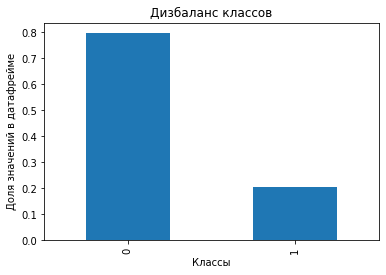

In [13]:
target.value_counts(normalize=True).plot(kind = 'bar')
plt.xlabel("Классы")
plt.ylabel("Доля значений в датафрейме")
plt.title("Дизбаланс классов")
plt.show()

Соотношение классов примерно 1:4

### Обучение модели без учета дисбаланса             

#### DecisionTree

In [14]:
best_depth = 0
best_f1 = 0
for depth in range(2, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1
print('Лучшая глубина', best_depth, ',', 'F1-score', best_f1)

Лучшая глубина 7 , F1-score 0.5534804753820034


#### RandomForest

In [15]:
# сначала рассмотрим количество деревьев с 1 до 150 с шагом в 10
best_est = 0
best_f1 = 0
for est in range (1, 150, 10):
    model = RandomForestClassifier(n_estimators = est, random_state = 12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_est = est
        best_f1 = f1
print('Лучшее количество деревьев', best_est, ',', 'F1-score', best_f1)

Лучшее количество деревьев 21 , F1-score 0.5783132530120482


Так как лучшее значение было выявлено при количестве деревьев 21, я рассмотрю подробнее интервал с 10 до 30 с интервалом 1, что бы выявить лечшее количество деревьев.

In [1]:
best_est = 0
best_f1 = 0
for est in range (10, 30, 1):
    model = RandomForestClassifier(n_estimators = est, random_state = 12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_est = est
        best_f1 = f1
        
string = f"Лучшее количество деревьев ${best_est}"

print(string)

print(f"text ${best_est} text 2 ${1+1}")
print('Лучшее количество деревьев', best_est, ',', 'F1-score', best_f1)

NameError: name 'RandomForestClassifier' is not defined

#### Логистическая регрессия

In [17]:
model = LogisticRegression(random_state = 12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print('F1', f1)

F1 0.07310704960835508


####  Accuracy, precision, recall, F-метрика

In [18]:
def metrics (features, target, features_valid, target_valid, max_depth, n_estimators):
    
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth)
    model.fit(features, target)
    predicted_valid = model.predict(features_valid)
    print('DecisionTree')
    print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
    print('Precision', precision_score(target_valid, predicted_valid))
    print('Recall', recall_score(target_valid, predicted_valid))
    print('F1', f1_score(target_valid, predicted_valid))
    print()
    
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators)
    model.fit(features, target)
    predicted_valid = model.predict(features_valid)
    print('RandomForest')
    print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
    print('Precision', precision_score(target_valid, predicted_valid))
    print('Recall', recall_score(target_valid, predicted_valid))
    print('F1', f1_score(target_valid, predicted_valid))
    print()

    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(features, target)
    predicted_valid = model.predict(features_valid)
    print('Логистическая регрессия')
    print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
    print('Precision', precision_score(target_valid, predicted_valid))
    print('Recall', recall_score(target_valid, predicted_valid))
    print('F1', f1_score(target_valid, predicted_valid))
    print()

In [19]:
metrics (features_train, target_train, features_valid, target_valid, 7, 13)

DecisionTree
Точность попадания по классам 0.8554150632215503
Precision 0.6848739495798319
Recall 0.46438746438746437
F1 0.5534804753820034

RandomForest
Точность попадания по классам 0.8669598680593733
Precision 0.7224489795918367
Recall 0.5042735042735043
F1 0.5939597315436241

Логистическая регрессия
Точность попадания по классам 0.805937328202309
Precision 0.46875
Recall 0.042735042735042736
F1 0.07832898172323761



#### ROC-AUC

RandomForestClassifier AUC-ROC  0.8248464876530271


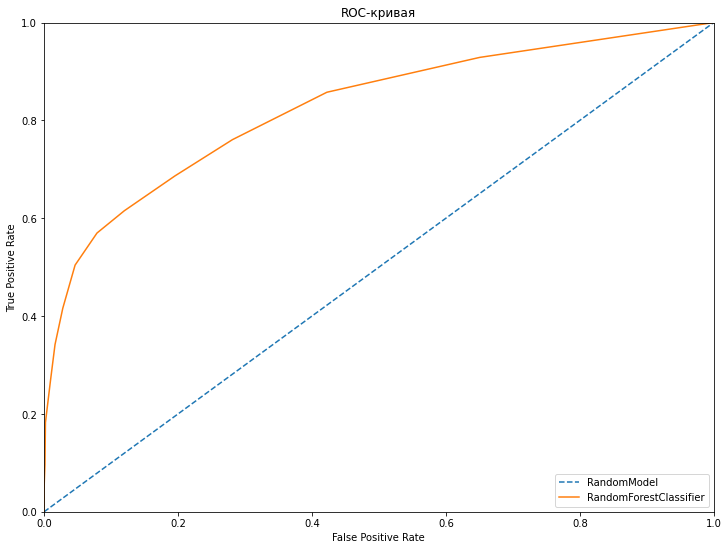

In [20]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = RandomForestClassifier(random_state=12345, n_estimators=13)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('RandomForestClassifier AUC-ROC ',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right')

plt.title("ROC-кривая")
plt.show()

### Вывод

Изучив результаты можно сказать, что метрики лучше у модели RandomForest с значением n_estimators=13.

## Борьба с дисбалансом

Для борьбы с дисбалансом существует 3 метода:

- С взвешенными классами
- С уменьшенной выборкой
- С увеличенной выборкой

### Взвешивание классов

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('DecisionTree')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=13, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('RandomForest')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

DecisionTree
Точность попадания по классам 0.736668499175371
Precision 0.4069767441860465
Recall 0.7977207977207977
F1 0.5389797882579404

RandomForest
Точность попадания по классам 0.8587135788894997
Precision 0.7136363636363636
Recall 0.4472934472934473
F1 0.5499124343257442

Логистическая регрессия
Точность попадания по классам 0.7108301264431006
Precision 0.3711340206185567
Recall 0.717948717948718
F1 0.4893203883495145



Вывод:
- Точность упала у всех моделей
- Precision упала у всех моделей
- Recall выросла у логистической регрессии и решающего дерева
- F1 выросла у логистической регрессии


### Увеличение выборки

In [22]:
def upsampled (features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

In [23]:
features_upsampled, target_upsampled = upsampled(features_train, target_train, 4)
print(target_upsampled.value_counts())

1    4504
0    4328
Name: exited, dtype: int64


In [24]:
metrics(features_upsampled, target_upsampled, features_valid, target_valid, 7, 13)

DecisionTree
Точность попадания по классам 0.7361187465640462
Precision 0.40638606676342526
Recall 0.7977207977207977
F1 0.5384615384615384

RandomForest
Точность попадания по классам 0.8438702583837273
Precision 0.6006006006006006
Recall 0.5698005698005698
F1 0.5847953216374269

Логистическая регрессия
Точность попадания по классам 0.6470588235294118
Precision 0.3107932379713914
Recall 0.6809116809116809
F1 0.42678571428571427



Вывод:
- Точность упала у всех моделей
- Precision упала у всех моделей
- Recall выросла у всех моделей
- F1 выросла у логистической регрессии

### Уменьшение выборки

In [25]:
def downsampled (features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac = fraction, random_state = 12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac = fraction, random_state = 12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state = 12345)
    
    return features_downsampled, target_downsampled

In [26]:
features_downsampled, target_downsampled = downsampled(features_train, target_train, 0.25)
print(target_downsampled.value_counts())

1    1126
0    1082
Name: exited, dtype: int64


In [27]:
metrics(features_downsampled, target_downsampled, features_valid, target_valid, 7, 13)

DecisionTree
Точность попадания по классам 0.7493128092358439
Precision 0.4200913242009132
Recall 0.7863247863247863
F1 0.5476190476190476

RandomForest
Точность попадания по классам 0.7443650357339198
Precision 0.4117647058823529
Recall 0.7578347578347578
F1 0.5336008024072216

Логистическая регрессия
Точность попадания по классам 0.640461792193513
Precision 0.30451612903225805
Recall 0.6723646723646723
F1 0.4191829484902309



Вывод:
- Точность упала у всех моделей
- Precision упала у всех моделей
- Recall выросла у всех моделей
- F1 выросла у логистической регрессии

### Вывод

Лучшей моделью по F-мере осталась модель, обученная на изначальных данных с дисбалансом. Разница в значениях f1 модели,обученной на изначальных данных с дисбалансом, и модели, сбалансированной увеличением выборки, всего 0.01. Не смотря на то, что на больших данных лучше будет работать сбалансированная модель, на имеющихся сейчас данных лучше работает модель, обученная на изначальных данных с дисбалансом.

## Тестирование модели

In [28]:
model = RandomForestClassifier(random_state=12345, n_estimators=13)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Точность попадания по классам 0.8602860286028603
Precision 0.735632183908046
Recall 0.5092838196286472
F1 0.6018808777429467



Выведем ROC-кривую и AUC-ROC для лучшей модели.

RandomForestClassifier AUC-ROC  0.8376348579033497


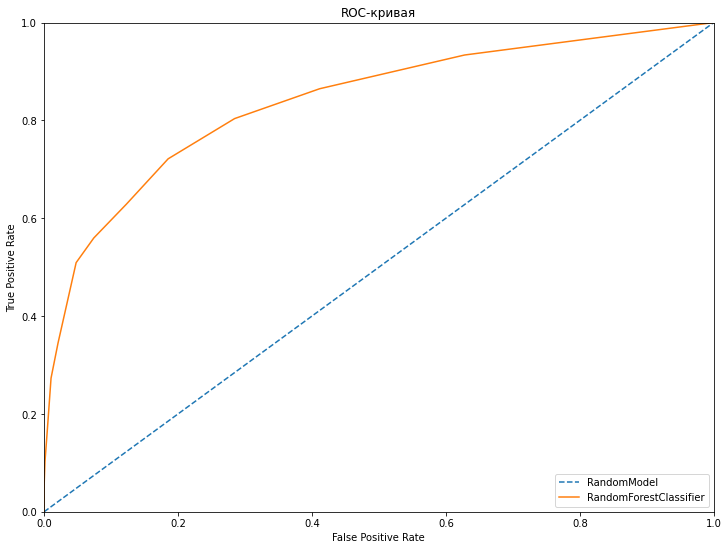

In [29]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = RandomForestClassifier(random_state=12345, n_estimators=13)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('RandomForestClassifier AUC-ROC ',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right')

plt.title("ROC-кривая")
plt.show()

## Вывод

Лучшей можелью можно считать модель:
- Основанную на RandomForest
- Значение 'n_estimators' - 125
- Дисбаланс выровнен методам увеличения выборки
Такая можель показывает F1 метрику: 0.6217008797653959, ROC-AUC: 0.86


# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*